In [19]:
import os

for i in range(1, len(os.listdir("interdata")), 2):
    print(i)

1
3
5
7
9
11
13


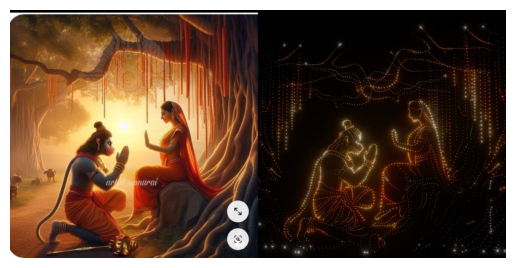

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

for idx, i in enumerate(range(1, len(os.listdir("interdata")), 2)):

    canvas = np.zeros((600,1200,3))

    ref = plt.imread(f'interdata/{i}.jpg').astype(np.float32) / 255.0
    target = plt.imread(f'interdata/{i+1}.jpg').astype(np.float32) / 255.0

    canvas[:, :600, :] = ref
    canvas[:, 600:, :] = target

    plt.imshow(canvas)
    plt.axis('off')

    canvas_uint8 = (canvas * 255).astype(np.uint8)

    # Create an image from the array and save
    Image.fromarray(canvas_uint8).save(f'data/drones/train/{idx}.jpg')

In [30]:
import numpy as np
from PIL import Image
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
import config

class MapDataset(Dataset):
    def __init__(self, root_dir):
        super().__init__()

        self.root_dir = root_dir
        self.list_files = os.listdir(root_dir)
        print(self.list_files)
    
    def __len__(self):
        return len(self.list_files)
    
    def __getitem__(self, index):
        image_path = self.list_files[index]
        file_path = os.path.join(self.root_dir, image_path)
        image = np.array(Image.open(file_path))
        input_image = image[:, :600, :]
        target_image = image[:, 600:, :]

        augmentations = config.both_transform(image=input_image, image0=target_image)
        input_image = augmentations["image"]
        target_image = augmentations["image0"]

        input_image = config.transform_only_input(image=input_image)["image"]
        target_image = config.transform_only_mask(image=target_image)["image"]

        return input_image, target_image

In [31]:
dataset = MapDataset("data/maps/train/")
dl = DataLoader(dataset)
dl

['63.jpg', '823.jpg', '189.jpg', '77.jpg', '837.jpg', '638.jpg', '604.jpg', '162.jpg', '176.jpg', '88.jpg', '610.jpg', '348.jpg', '360.jpg', '406.jpg', '412.jpg', '374.jpg', '1019.jpg', '599.jpg', '1025.jpg', '1031.jpg', '228.jpg', '214.jpg', '572.jpg', '566.jpg', '200.jpg', '957.jpg', '943.jpg', '994.jpg', '758.jpg', '980.jpg', '770.jpg', '764.jpg', '765.jpg', '771.jpg', '981.jpg', '759.jpg', '995.jpg', '942.jpg', '956.jpg', '567.jpg', '201.jpg', '215.jpg', '573.jpg', '229.jpg', '1030.jpg', '1024.jpg', '598.jpg', '1018.jpg', '413.jpg', '375.jpg', '361.jpg', '407.jpg', '349.jpg', '177.jpg', '611.jpg', '89.jpg', '605.jpg', '163.jpg', '639.jpg', '188.jpg', '836.jpg', '76.jpg', '822.jpg', '62.jpg', '74.jpg', '834.jpg', '60.jpg', '820.jpg', '48.jpg', '808.jpg', '149.jpg', '613.jpg', '175.jpg', '161.jpg', '607.jpg', '388.jpg', '439.jpg', '377.jpg', '411.jpg', '405.jpg', '363.jpg', '1032.jpg', '1026.jpg', '559.jpg', '203.jpg', '565.jpg', '571.jpg', '217.jpg', '940.jpg', '798.jpg', '954.jpg',

In [36]:
next(iter(dataset))[1].shape

torch.Size([3, 256, 256])

In [38]:
dataset = MapDataset("data/maps/train/")
loader = DataLoader(dataset, batch_size=5)
for x, y in loader:
    print(x.shape)
    save_image(x, "x.png")
    save_image(y, "y.png")

['63.jpg', '823.jpg', '189.jpg', '77.jpg', '837.jpg', '638.jpg', '604.jpg', '162.jpg', '176.jpg', '88.jpg', '610.jpg', '348.jpg', '360.jpg', '406.jpg', '412.jpg', '374.jpg', '1019.jpg', '599.jpg', '1025.jpg', '1031.jpg', '228.jpg', '214.jpg', '572.jpg', '566.jpg', '200.jpg', '957.jpg', '943.jpg', '994.jpg', '758.jpg', '980.jpg', '770.jpg', '764.jpg', '765.jpg', '771.jpg', '981.jpg', '759.jpg', '995.jpg', '942.jpg', '956.jpg', '567.jpg', '201.jpg', '215.jpg', '573.jpg', '229.jpg', '1030.jpg', '1024.jpg', '598.jpg', '1018.jpg', '413.jpg', '375.jpg', '361.jpg', '407.jpg', '349.jpg', '177.jpg', '611.jpg', '89.jpg', '605.jpg', '163.jpg', '639.jpg', '188.jpg', '836.jpg', '76.jpg', '822.jpg', '62.jpg', '74.jpg', '834.jpg', '60.jpg', '820.jpg', '48.jpg', '808.jpg', '149.jpg', '613.jpg', '175.jpg', '161.jpg', '607.jpg', '388.jpg', '439.jpg', '377.jpg', '411.jpg', '405.jpg', '363.jpg', '1032.jpg', '1026.jpg', '559.jpg', '203.jpg', '565.jpg', '571.jpg', '217.jpg', '940.jpg', '798.jpg', '954.jpg',

KeyboardInterrupt: 

In [44]:
x[0].shape

torch.Size([3, 256, 256])